#### **Bank Marketing Campaign Success Prediction - Using Classification Models**

The success of marketing campaigns is analyzed to predict whether customers will subscribe to term deposits. In this analysis, we aim to classify campaign outcomes using **`Logistic Regression`**, **`Decision Tree`**, and **`XGBoost`** algorithms, with a focus on feature selection and model evaluation.

# **Importing essential Libraries**

In [2]:
# Importing necessary libraries
import numpy as np                                                              # For numerical operations and handling arrays
import pandas as pd                                                             # For data manipulation and analysis
import seaborn as sns                                                           # For statistical data visualization (e.g., heatmaps)
import matplotlib.pyplot as plt                                                 # For general plotting and visualization

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Importing tools for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split                                    # To split data into training and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score     # For model evaluation metrics
from sklearn.model_selection import cross_val_score                                     # For performing cross-validation

# Standardization for consistent model performance
from sklearn.preprocessing import StandardScaler                                        # To scale features for uniformity

# Importing classification models

from sklearn.linear_model import LogisticRegression                                     # Logistic Regression for binary classification
from sklearn.tree import DecisionTreeClassifier                                         # Decision Tree for rule-based classification
from xgboost import XGBClassifier                                                       # XGBoost, an ensemble method for robust predictions


# **Loading Bank DataSet**

In [3]:
# Loading the Bank Marketing Dataset
# Define the path to the CSV file containing the bank marketing dataset
csv_file = 'Data/bank-full.csv'

# Reading the CSV file into a pandas DataFrame using the semicolon (;) as the delimiter
bank_marketing_df = pd.read_csv(csv_file, sep=';')
 

# **Statistical Overview of the Dataset**

## **Exploring the Dataset**

In [4]:
# Displaying the first 5 rows of the dataset to understand its structure and content
print("Dataset Head:")
bank_marketing_df.head()

Dataset Head:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Displaying the last 10 rows of the dataset to examine its structure and content at the end
print("Dataset Tail:")
bank_marketing_df.tail(10)

Dataset Tail:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
# Displaying the shape of the dataset to understand its dimensions (number of rows and columns)
print("Dataset Shape:")
bank_marketing_df.shape

Dataset Shape:


(45211, 17)

In [7]:
# Checking for missing values in each column of the dataset
# This helps identify columns that may need imputation or handling before further analysis
print("Missing Values per Column:")
bank_marketing_df.isnull().sum()


Missing Values per Column:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# **Statistical Overview Of Data**

In [8]:
# Displaying dataset information, including column data types and non-null values
# This helps in understanding the structure, data types, and presence of missing values
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Displaying summary statistics of the dataset to get an overview of numerical columns
bank_marketing_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# **Data Preprocessing**

Encoding categorical columns using Label Encoding.

This converts string labels into numeric values to be used in machine learning models.


In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = bank_marketing_df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_columns:
    bank_marketing_df[col] = le.fit_transform(bank_marketing_df[col])

# **Feature Selection**

In [11]:
X = bank_marketing_df.drop(columns='y')
Y = bank_marketing_df['y']

We are using **Correlation Analysis**, **Mutual Information Score**, and **SelectKBest** techniques we can choose features that have the most significant impact on the *target variable*, removing irrelevant features.

It helps improve model performance by reducing overfitting, enhancing accuracy, and speeding up computation.

### **Correlation Analysis**

/tmp/ipykernel_184527/2925134075.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='viridis')


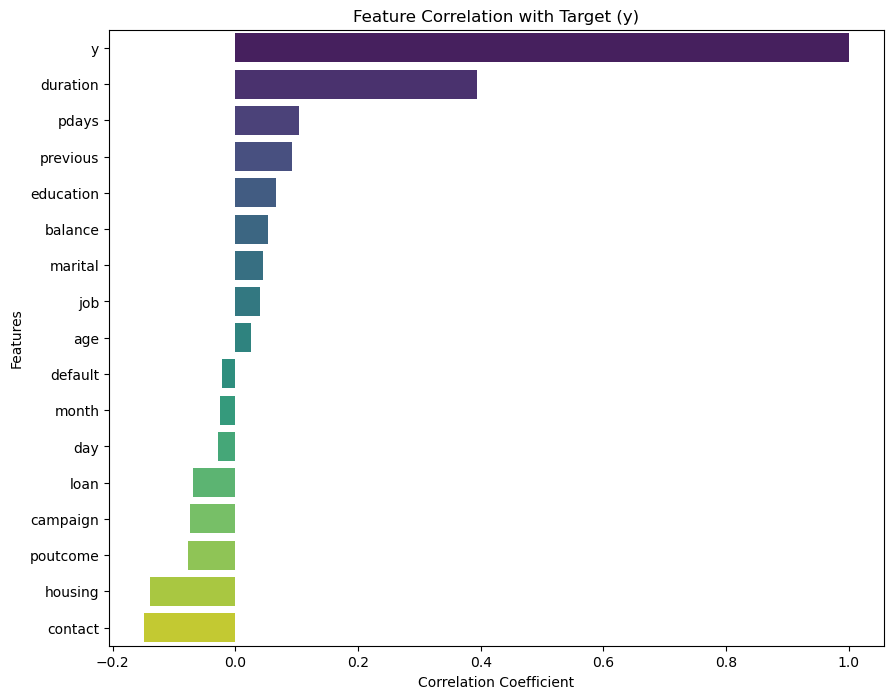

Features selected based on correlation: ['y', 'duration', 'pdays', 'housing', 'contact']


In [12]:

# Performing correlation analysis to identify highly correlated features with the target variable 'y'
corr = bank_marketing_df.corr()['y'].sort_values(ascending=False)

# Plotting correlation values of features with the target variable
plt.figure(figsize=(10, 8))
sns.barplot(x=corr.values, y=corr.index, palette='viridis')
plt.title('Feature Correlation with Target (y)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Selecting features that have a correlation greater than 0.1 or less than -0.1 with the target variable
strong_corr_feat = corr[corr.abs() > 0.1].index.tolist()
print("Features selected based on correlation:", strong_corr_feat)


### **Mutual Information Score**

/tmp/ipykernel_184527/2475792605.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI Score', y='Feature', data=mi_feat, palette='viridis')


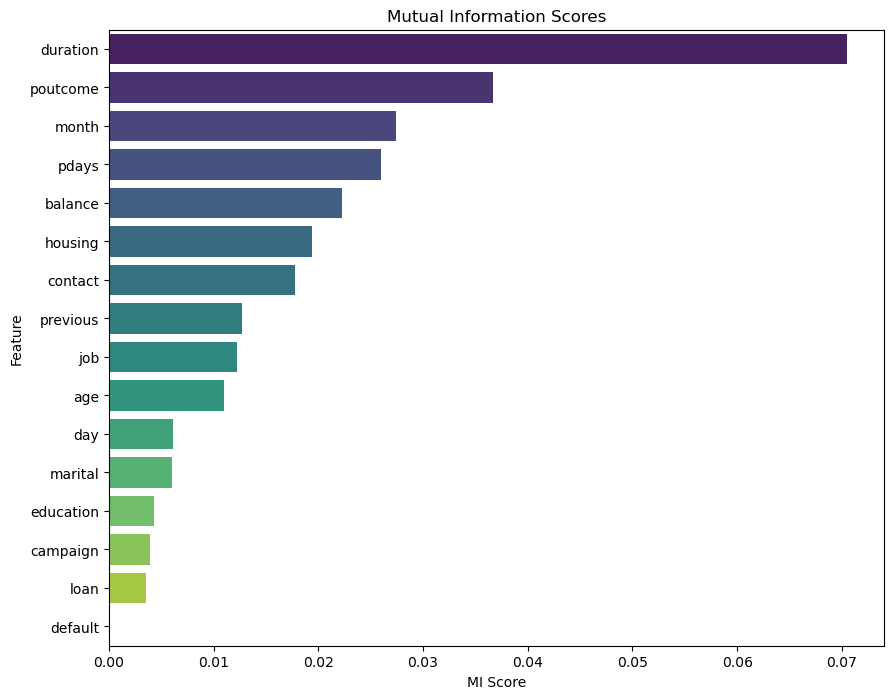

Top features based on mutual information: ['duration', 'poutcome', 'month', 'pdays', 'balance', 'housing', 'contact', 'previous', 'job', 'age']


In [13]:
# Applying mutual information to evaluate the relationship between features and target 'y'
mi_scores = mutual_info_classif(X, Y, random_state=42)

# Creating a DataFrame to show the mutual information scores for each feature
mi_feat = pd.DataFrame({
                        'Feature': X.columns,
                        'MI Score': mi_scores
                    }).sort_values(by='MI Score', ascending=False)

# Plotting the mutual information scores for each feature
plt.figure(figsize=(10, 8))
sns.barplot(x='MI Score', y='Feature', data=mi_feat, palette='viridis')
plt.title('Mutual Information Scores')
plt.show()

# Selecting top 10 features based on mutual information scores
top_mi_feat = mi_feat['Feature'].head(10).tolist()
print("Top features based on mutual information:", top_mi_feat)


### **SelectKBest**

In [14]:
# Applying SelectKBest feature selection technique to identify the top 10 features
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_kbest = selector.fit_transform(X, Y)

# Extracting the selected features from the original dataset
kbest_feat = X.columns[selector.get_support()].tolist()
print("Top features selected by SelectKBest:", kbest_feat)

Top features selected by SelectKBest: ['age', 'job', 'balance', 'housing', 'contact', 'month', 'duration', 'pdays', 'previous', 'poutcome']


### **Combining & Declaring Selected Features**

In [15]:
# Combining features selected from correlation analysis, mutual information, and SelectKBest
combined_features = set(strong_corr_feat).union(top_mi_feat).union(kbest_feat)
print("Combined significant features:", combined_features)

Combined significant features: {'housing', 'age', 'y', 'month', 'contact', 'duration', 'previous', 'poutcome', 'balance', 'pdays', 'job'}


In [16]:
# Creating a new DataFrame with the selected features
Features = bank_marketing_df[list(combined_features)]
X = Features.drop(columns='y')
Y = Features['y']

# **Model Traning**
### **Data Scaling**

In [32]:
# Scaling the features using StandardScaler to standardize the dataset for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### **Data Splitting**

In [25]:
# Splitting the dataset into training and testing sets (25% test, 75% train)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Printing the shape of the training data to check the number of samples and features
print(X_train.shape)
print(Y_train.shape)

(33908, 10)
(33908,)


### **Model Initialization**

In [26]:
models = {
    'Logistic Regression': LogisticRegression(solver="saga",max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

### **Model Traning**

In [27]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)  # Train the model

### **Model Evaluation using 5 folds Cross-Validation**

In [28]:
 # Creating a dictionary to store model performance scores
model_scores = {}

# Evaluating each model using 5-fold cross-validation and recording the mean accuracy score
for model_name, model in models.items():
    # Perform 5-fold cross-validation to evaluate the model's performance
    cross_val = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    model_scores[model_name] = cross_val.mean()       # Storing the mean accuracy score for each model

# Displaying the cross-validation accuracy scores for each model
print("Cross-validation Accuracy Scores:")
for model_name, score in model_scores.items():
    print(f"{model_name}: {score:.2f}")               # Outputting the model name and its corresponding accuracy score

Cross-validation Accuracy Scores:
Logistic Regression: 0.89
Decision Tree: 0.87
XGBoost: 0.90


## **Model Evaluation and Performance Comparison**

We have successfully trained  **`Logistic Regression`**, **`Decision Tree`** & **`XGBoost`**

Now, it's time to evaluate the performance of these models on the test data. The evaluation will be done using the following key metrics **`Accuracy`**, **`Precision`**, **`Recall`** & **`F1-Score`**

We will calculate these metrics for each model and compare their performances to determine which one is the most suitable for our problem.

#### **Evaluation Process**

For each model, we have:
1. Performed **`5-fold cross-validation`** to estimate its accuracy.
2. Trained the model using the entire training dataset.
3. Evaluated the model using the **`test data`** to calculate precision, recall, F1-score, and accuracy.


#### **Model Comparison**

Once the performance metrics are calculated, we will present a comparison of the models based on their ability to generalize to unseen data. The metrics will help us understand:
- Which model provides the most reliable predictions.
- Which model strikes the best balance between **`Precision`**, **`Recall`** & **`F1-Score`**.
- Which model is most accurate overall.

By comparing these results, we can make an informed decision about the model that performs best for the given task.



In [29]:
# Storing evaluation metrics (Accuracy, Precision, Recall, F1-Score) for each model
evaluation_metrics = {}

# Loop through each model to train and evaluate its performance on the test set
for model_name, model in models.items():
    
    # Make predictions on the test set using the trained model
    Y_pred = model.predict(X_test)
    
    # Calculate various evaluation metrics to assess model performance and Store the evaluation metrics for the current model
    evaluation_metrics[model_name] = {
        'Accuracy': accuracy_score(Y_test, Y_pred),                # Accuracy: Proportion of correct predictions
        'Precision': precision_score(Y_test, Y_pred),              # Precision: Proportion of positive predictions that are correct
        'Recall': recall_score(Y_test, Y_pred),                    # Recall: Proportion of actual positives that are correctly identified
        'F1-Score': f1_score(Y_test, Y_pred)                       # F1-Score: Harmonic mean of Precision and Recall
    }


# Creating a DataFrame from the evaluation metrics dictionary
evaluation_metrics_df = pd.DataFrame(evaluation_metrics).T.round(2)

# Sorting the DataFrame by Accuracy, then Precision, F1-Score, and Recall in descending order
evaluation_metrics_df.sort_values(by=['Accuracy', 'Precision', 'F1-Score', 'Recall'], ascending=False, inplace=True)

# Displaying the DataFrame containing evaluation metrics for each model
print("Model Evaluation Metrics:")
evaluation_metrics_df


Model Evaluation Metrics:


,Accuracy,Precision,Recall,F1-Score
XGBoost,0.90,0.61,0.46,0.52
Logistic Regression,0.88,0.62,0.10,0.17
Decision Tree,0.87,0.46,0.46,0.46


# **Feature Importance Calculation and Visualization**

In [30]:
# Creating an empty list to store feature importance data for each model
model_importance_list = []

# Looping through each model to calculate and store feature importance
for model_name, model in models.items():

    # Calculating feature importance based on the model type
    if model_name == 'Logistic Regression':
        # Logistic Regression uses coefficients as feature importance
        importance_values = np.abs(model.coef_[0])  # Getting the absolute values of the coefficients   
    else:
        # Decision Tree & XGBoost use the 'feature_importances_' attribute for feature importance
        importance_values = model.feature_importances_
    
    feature_importance = pd.DataFrame({
    'Model': [model_name] * len(X_train.columns),
    'Feature': X_train.columns,
    'Importance': importance_values }).sort_values(by='Importance', ascending=False)

    # Appending each model's feature importance data to the list
    model_importance_list.append(feature_importance)



### **Show Plot**

                  Model   Feature  Importance
0   Logistic Regression       age    0.057625
1   Logistic Regression     month    0.010160
2   Logistic Regression       job    0.006743
3   Logistic Regression  poutcome    0.005063
4   Logistic Regression  duration    0.002036
5   Logistic Regression   contact    0.001948
6   Logistic Regression   housing    0.001527
7   Logistic Regression     pdays    0.001139
8   Logistic Regression  previous    0.000467
9   Logistic Regression   balance    0.000008
10        Decision Tree  duration    0.342863
11        Decision Tree   balance    0.162171
12        Decision Tree       age    0.140456
13        Decision Tree     month    0.111835
14        Decision Tree     pdays    0.064615
15        Decision Tree       job    0.062204
16        Decision Tree  poutcome    0.053333
17        Decision Tree   contact    0.025094
18        Decision Tree   housing    0.022891
19        Decision Tree  previous    0.014537
20              XGBoost  poutcome 

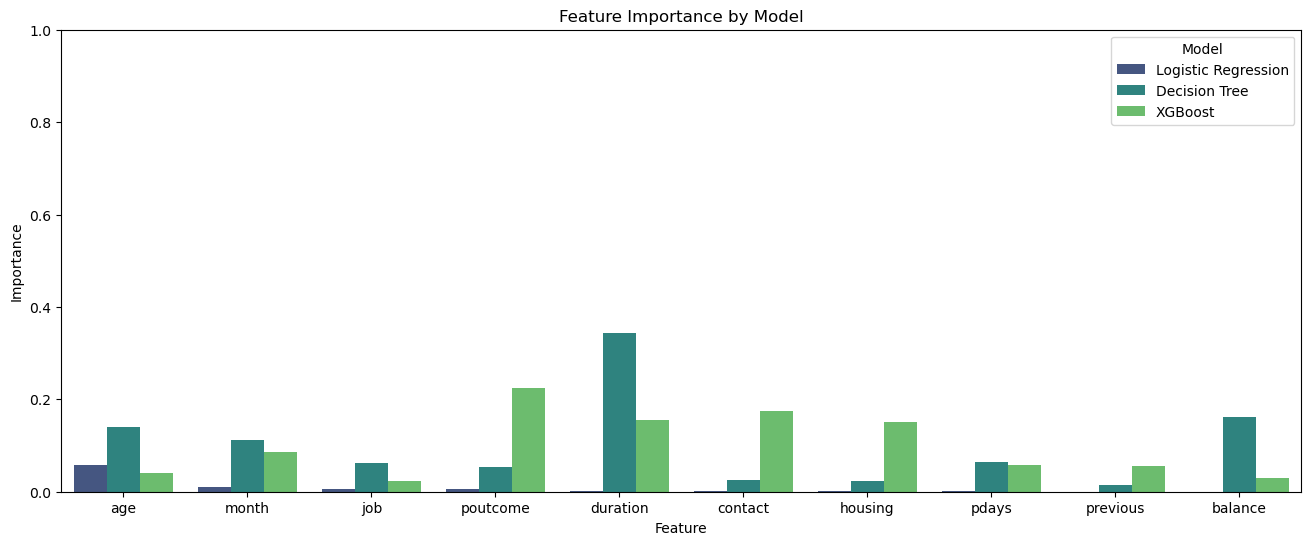

In [33]:
# Combining all feature importance data into a single DataFrame for comparison
final_importance_df = pd.concat(model_importance_list, axis=0, ignore_index=True)
# Plotting feature importance for each model
plt.figure(figsize=(16, 6))  # Setting figure size for the plot
sns.barplot(data=final_importance_df, x='Feature', y='Importance', hue='Model', palette='viridis')  # Creating a bar plot
plt.title('Feature Importance by Model')  # Setting plot title
plt.xlabel('Feature')  # Label for x-axis
plt.ylabel('Importance')  # Label for y-axis
plt.ylim(0, 1)  # Setting y-axis limits as feature importance values
plt.show()


### Feature Importance & Impact

- **Logistic Regression**:
    - **`age`** and **`month`** emerge as key predictors, with **`age`** slightly more influential than **`month`**.
    - **`job`** and **`poutcome`** also contribute to model predictions, though with lower importance.
    - **`duration`** and **`contact`** show marginal impact, indicating that interaction length and method have a limited role.
    - **`housing`** and **`pdays`** are less important, contributing very little to the overall model.

- **Decision Tree**:
    - **`duration`** stands out as the most significant feature, followed by **`balance** and **`age`**, highlighting the importance of interaction length and financial stability.
    - **`month`** plays a notable role, suggesting seasonal trends influence outcomes.
    - **`pdays`**, **`job`**, and **`poutcome`** also show moderate importance.
    - **`contact`** and **`housing`** have a lower impact in this model.

- **XGBoost**:
    - **`poutcome`** and **`contact`** are the top features, underscoring the importance of past interactions and the method of communication.
    - **`duration`** and **`housing`** are also impactful, with **`duration`** contributing significantly.
    - **`month`** and **`pdays`** show some importance, suggesting timing factors affect success.
    - **`previous`** and **`age`** have moderate influence, while **`balance`** and **`job`** are less impactful.

### Conclusion

- **Past engagement** (**`poutcome`** and **`contact`**) consistently plays a critical role across all models.
- **Financial indicators** such as **`balance`** and **`housing`** are crucial, especially in the **Decision Tree** and **XGBoost** models.
- **Interaction length** (**`duration`**) is significant in both **Decision Tree** and **XGBoost** models, while **timing factors** (**`month`**) also contribute to success rates.
- **Demographic information** (**`age`**) is important, particularly in **Decision Tree** and **XGBoost** models, though it plays a smaller role in **Logistic Regression**.

### Actionable Insights

- Prioritize customers with positive **past interactions** (**`poutcome`** and **`contact`**).
- Focus on financial stability indicators, such as **`balance`** and **`housing`**, when targeting potential customers.
- Extend customer engagement through longer **interactions** (**`duration`**) and optimize communication methods.
- Leverage **seasonal trends** (**`month`**) and demographic factors (**`age`**) to time campaigns effectively.
